# <font color='blue'>Equações Não Lineares</font>

### Material produzido por Luis Gustavo Nonato

ICMC-USP

----

### Conteúdo
- Zero de Funções de uma Variável
- Método de Newton
- Sistema de Equações não Lineares
    - Método de Newton para sistemas
    - Método Quase-Newton
- Multiplicadores de Lagrange
    - Otimização com restrição de igualdade

### Bibliografia

- Uri Acher e Chen Greif, A First Course in Numerical Methods, SIAM, 2011 (Capítulo 9)

- A. Quarteroni, R. Sacco, F. Saleri, Numerical Mathematics, Springer, 1991 (Capítulos 6 e 7)

## <font color='blue'> Zero de Funções de uma Variável</font>

O problema que iremos abordar inicialmente é como resolver uma equação do tipo:

$$
f(x)=0
$$

onde $f:\mathbb{R}\rightarrow\mathbb{R}$. Ou seja, como podemos encontrar os pontos $x$ onde a função $f$ vale zero. Um exemplo típico é quando a função é um polinômio, ou seja, $f(x)=a_0+a_1x+a_2x^2+\cdots+a_kx^k$, onde um conjunto grande resultados teóricos e computacionais existem. Porém, iremos supor que $f$ é uma função qualquer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(1, 1.5, '$2\\cos(3x^2)\\exp(-x^2)$')

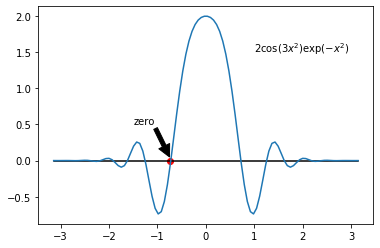

In [5]:
x = np.linspace(-np.pi,np.pi,100)
f = lambda x: 2*np.cos(3*x**2)*np.exp(-x**2)

plt.plot([-np.pi,np.pi],[0,0],color='k')
plt.plot(x,f(x))
plt.annotate('zero', xy=(-0.75, 0.05), xytext=(-1.5, 0.5),
            arrowprops=dict(facecolor='black', shrink=0.001),
            )
plt.scatter(-0.73,0,color='red')
plt.text(1,1.5,'$2\cos(3x^2)\exp(-x^2)$')

Uma forma simples de identificar onde os zeros da função estão localizados é encontrar um intervalo $[a,b]$ tal que $f(a)f(b)<0$. Uma vez que tal intervalo tenha sido encontrado, podemos subdivi-lo de modo a obtermos uma melhor aproximação.

Um zero da função é aproximadamente x= -1.7881393432617188e-07


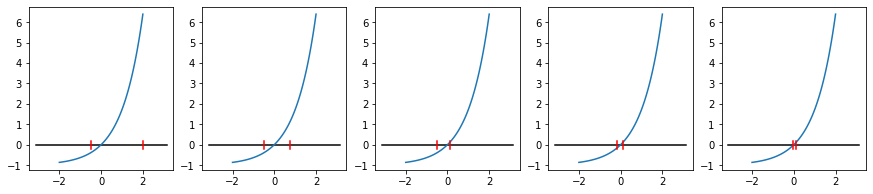

In [3]:
fig, ax = plt.subplots(1,5,figsize=(15,3))

x = np.linspace(-2,2,100)
f = lambda x: np.exp(x)-1

eps = 1e-7
ab = np.array([-0.5,2])
i = 0
while (np.abs(ab[0]-ab[1])>eps):
    if i < 5:
        ax[i].plot([-np.pi,np.pi],[0,0],color='k')
        ax[i].plot(x,f(x))
        ax[i].plot([ab[0],ab[0]],[-0.2,0.2],color='red')
        ax[i].plot([ab[1],ab[1]],[-0.2,0.2],color='red')
        i=i+1
    
    m = np.mean(ab)
    if (np.abs(f(m)) < eps):
        break
    if f(ab[0]*f(m)<0):
        ab[1] = m
    else:
        ab[0] = m

print('Um zero da função é aproximadamente x=',ab[0])

O problema com o método acima, chamado de bisseção, é que precisos encontrar um intervalo inicial válido, o que nem sempre é uma tarefa fácil. 

## <font color='blue'> Método de Newton </font>

### Revisão de Série de Taylor

Expansão em série de Taylor de uma função $f:\mathbb{R}\rightarrow\mathbb{R}$

$$
f(t+h)=f(t)+hf^\prime(t)+\frac{h^2}{2!}f^{\prime\prime}(t)+\frac{h^3}{3!}f^{\prime\prime\prime}(t)+\cdots
$$

$$
f(t+h) = a_0+a_1h+a_2h^2+\cdots 
$$

$a_0=f(t), \, a_1=f^\prime(t), \, a_2 = \frac{f^{\prime\prime}(t)}{2!}, \ldots$

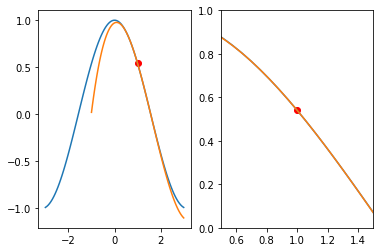

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t =  np.linspace(-3,3,100)
f = np.cos(t)

n=100
h=np.linspace(-2,2,n)
fh = np.cos(1)*np.ones((n,)) - h*np.sin(1) - h**2/2*np.cos(1) + h**3*np.sin(1)/6  # o ponto de aproximacao é 1

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.scatter(1,np.cos(1),c='r')
ax1.plot(t,f)
ax1.plot(1+h,fh)

ax2.set_xlim(0.5,1.5)
ax2.set_ylim(0.0,1.0)
ax2.scatter(1,np.cos(1),c='r')
ax2.plot(t,f)
ax2.plot(1+h,fh)

O **método de Newton** é um mecanismo muito mais eficaz que o método da bisseção para encontrar o zeros de uma função. A idéia do método de Newton é bastante simples: suponha $x_k$ um ponto próximo da uma raiz $\overline{x}$ da função $f$. Utilizando série de Taylor, podemos aproximar $f$ da forma:

$$
h = \overline{x}-x_k\\
\\
f(x_k+h)\approx f(x_k)+hf^{\prime}(x_k) \\
\Downarrow \\
f(\overline{x})\approx f(x_k)+f^{\prime}(x_k)(\overline{x}-x_k)
$$

como $f(\overline{x})=0$, temos que

$$
\overline{x}\approx x_k-\frac{f(x_k)}{f^{\prime}(x_k)}
$$

A expressão acima nos permite construir um processo iterativa para aproximar raize da função:

$$
x_{i+1}=x_i-\frac{f(x_i)}{f^{\prime}(x_i)}
$$

sendo este o método de Newton.

**Interpretando o método de Newton**

Lembrando que $f^{\prime}(x)$ fornece a inclinação da reta tangente no ponto $x$, a equação da reta tangente é dada por:

$$
y-y_0=f^{\prime}(x)(x-x_0)
$$

sendo $(x_0,y_0)$ um ponto qualquer por onde a reta passa. Se tomarmos $y_0=0$ e fazendo $x=x_i$, temos:

$$
f(x_i) = f^{\prime}(x_i)(x_i-x_0)\rightarrow x_0 = x_i-\frac{f(x_i)}{f^{\prime}(x_i)}
$$

ou seja, $x_0$, que corresponde ao ponto $x_{i+1}$ do método de Newton, é a interseção da reta tangente com o eixo $x$.

Text(1.6235759075343454, -10, '$x_{i+2}$')

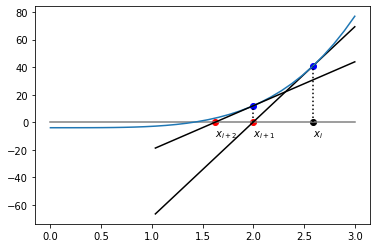

In [15]:
x = np.linspace(0,3,30)
f = lambda x: x**4-4

xi = -5
retaxi = f(x[xi])+4*x[xi]**3*(x-x[xi])


plt.plot([0,3],[0,0],color='gray')
plt.plot(x[10:],retaxi[10:],color='k')
plt.plot(x,f(x))
plt.scatter(x[xi],f(x[xi]),color='blue')
plt.plot([x[xi],x[xi]],[0,f(x[xi])],color='k',linestyle=':')

plt.scatter(x[xi],0,color='k')
plt.text(x[xi], -10,'$x_i$')
plt.scatter(x[xi]-f(x[xi])/(4*x[xi]**3),0,color='red')
plt.text(x[xi]-f(x[xi])/(4*x[xi]**3), -10,'$x_{i+1}$')

xii = x[xi]-f(x[xi])/(4*x[xi]**3)
retaxii = f(xii)+4*xii**3*(x-xii)
plt.plot(x[10:],retaxii[10:],color='k')
plt.scatter(xii,f(xii),color='blue')
plt.plot([xii,xii],[0,f(xii)],color='k',linestyle=':')
plt.scatter(xii-f(xii)/(4*xii**3),0,color='red')
plt.text(xii-f(xii)/(4*xii**3), -10,'$x_{i+2}$')

### Critério de Parada

Podemos ter vários critérios de parada

1. $|f(x_k)|\leq \epsilon$
2. $|x_k - x_{k-1}|\leq \epsilon$
3. realizar $n$ passo, com $n\approx 20$

onde $\epsilon$ é um número próximo de zero.

**Exemplo**:

Vamos encontrar um zero da função 

$$
f(x) = 2\cosh(x/4) − x
$$

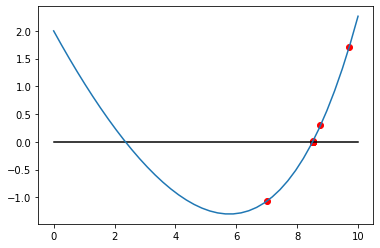

In [20]:
x = np.linspace(0,10,40)
f = lambda t: 2*np.cosh(t/4)-t
fl = lambda t: 0.5*np.sinh(t/4)-1

xi = 7.0
for i in range(10):
    plt.scatter(xi,f(xi),color='red')
    xi = xi-f(xi)/fl(xi)
    
    
plt.plot([0,10],[0,0],color='k')
plt.plot(x,f(x))
plt.scatter(xi,0,color='red')

**OBS:** Note que dependendo de onde está a condição inicial, o método converge para diferentes raízes.

**Exemplo de não convergência**

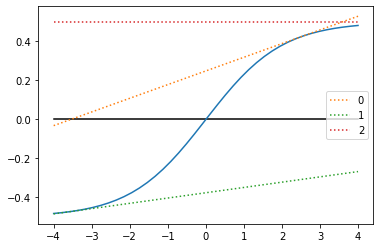

In [23]:
x = np.linspace(-4,4,40)
f = lambda t: 1/(1+np.exp(-t))-0.5
fl = lambda t: np.exp(-t)/(1+np.exp(-t))**2

plt.plot([-4,4],[0,0],color='k')
plt.plot(x,f(x))
xi = 2.5
#xi = 1.5
for i in range(3):
    plt.plot(x,f(xi)+fl(xi)*(x-xi),linestyle=':',label=i)
    xi = xi-f(xi)/fl(xi)
    
plt.legend()

Idealmente, ponto inicial deve estar próximo do zero da função, mas mesmo assim a convergência não é garantida.

## <font color='blue'> Sistema de Equações não Lineares </font>

Suponha que ao invés de termos uma única função, tenhamos um sistema com $n$ equações e $n$ variáveis da forma:

$$
h_1(x_1,\ldots,x_n)=0\\
h_2(x_1,\ldots,x_n)=0\\
\vdots\\
h_n(x_1,\ldots,x_n)=0
$$

onde $h_i:\mathbb{R}^n\rightarrow\mathbb{R}$ são funções não lineares. Neste caso, o objetivo é encontrar pontos $\mathbf{x}=(x_1,\ldots,x_n)$ que satisfaçam todas as equações simultaneamente.

Por exemplo:

$$
h_1(x_1,x_2) = x_1^2-2x_1-x_2+1 = 0\\
h_2(x_1,x_2) = x_1^2+x_2^2-1 = 0
$$

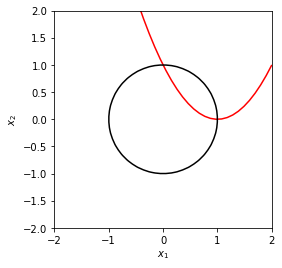

In [28]:
xx1, xx2 = np.meshgrid(np.linspace(-2,2,40),np.linspace(-2,2,40))
zz1 = xx1**2-2*xx1-xx2+1
zz2 = xx1**2+xx2**2-1

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
CS1 = ax.contour(xx1, xx2, zz1,levels = [0.0],colors='red')
CS2 = ax.contour(xx1, xx2, zz2,levels = [0.0],colors='k')

### Método de Newton

Um sistema de equações pode ser descrito como uma aplicação $\mathbf{H}:\mathbb{R}^n\rightarrow\mathbb{R}^n$ da forma

$$
\mathbf{H}(\mathbf{x})=(h_1(\mathbf{x}),h_2(\mathbf{x}),\ldots,h_n(\mathbf{x})) = \mathbf{0}
$$

Supondo um ponto $\mathbf{x}_k$ próximo de uma solução $\mathbf{\overline{x}}$ do sistema, a o valor $\mathbf{H}(\mathbf{\overline{x}})$ pode ser aproximada por série de Taylor da seguinte forma:

$$
\mathbf{H}(\mathbf{\overline{x}})\approx\mathbf{H}(\mathbf{x}_k)+J_{\mathbf{x}_k}(\mathbf{\overline{x}}-\mathbf{x}_k)
$$

onde $J_{\mathbf{x}_k}$ é a matriz Jacobiana dada por:

$$
J_{\mathbf{x}_k}=
\begin{bmatrix}
\frac{\partial h_1}{x_1}(\mathbf{x}_k) & \frac{\partial h_1}{x_2}(\mathbf{x}_k) & \cdots & \frac{\partial h_1}{x_n}(\mathbf{x}_k)\\
\frac{\partial h_2}{x_1}(\mathbf{x}_k) & \frac{\partial h_2}{x_2}(\mathbf{x}_k) & \cdots & \frac{\partial h_2}{x_n}(\mathbf{x}_k)\\
& & \vdots & \\
\frac{\partial h_n}{x_1}(\mathbf{x}_k) & \frac{\partial h_n}{x_2}(\mathbf{x}_k) & \cdots & \frac{\partial h_n}{x_n}(\mathbf{x}_k)
\end{bmatrix}
$$

Como $\mathbf{H}(\mathbf{\overline{x}})=\mathbf{0}$

$$
\mathbf{H}(\mathbf{\overline{x}})=\mathbf{0}\\
\Downarrow\\
\mathbf{H}(\mathbf{x}_k)+J_{\mathbf{x}_k}(\mathbf{\overline{x}}-\mathbf{x}_k) = 0\\
\Downarrow\\
\mathbf{\overline{x}} = \mathbf{x}_k - J_{\mathbf{x}_k}^{-1}\mathbf{H}(\mathbf{x}_k)
$$

Note que estamos assumindo que a matriz Jacobiana é inversível e que o método acima consiste em resolver o sistema linear:

$$
J_{\mathbf{x}_k}\Delta\mathbf{x} = -\mathbf{H}(\mathbf{x}_k)
$$

onde $\Delta\mathbf{x}=(\mathbf{\overline{x}} - \mathbf{x}_k)$

Em outras palavras, a metodologia acima nos fornece um processo iterativo para encontrarmos a solução de um sistema de equações não lineares, que pode ser descrito como:

**Método de Newton**

1. Forneça uma condição inicial $\mathbf{x}_0$
2. Resolva $J_{\mathbf{x}_i}\Delta\mathbf{x} = -\mathbf{H}(\mathbf{x}_i)$
3. $\mathbf{x}_{i+1} = \mathbf{x}_i+\Delta\mathbf{x}$
4. Repita os passos 2 e 3 até que o método convirja. 

**Exemplo**

$$
h_1(x_1,x_2) = x_1^2-2x_1-x_2+1 = 0\\
h_2(x_1,x_2) = x_1^2+x_2^2-1 = 0
$$

In [33]:
h1 = lambda x1,x2: x1**2 - 2*x1 - x2 + 1
h2 = lambda x1,x2: x1**2 + x2**2 - 1

J = lambda x1,x2: np.array([[2*x1-2, -1],[2*x1, 2*x2]])

#xi = np.array([1.5,0.5])
xi = np.array([-0.5,1.5])
H = np.zeros(2)
for i in range(10):
    H[:] = [h1(xi[0],xi[1]),h2(xi[0],xi[1])]
    Dx = np.linalg.solve(J(xi[0],xi[1]),-H)
    xi = xi + Dx
    
print(h1(xi[0],xi[1]),h2(xi[0],xi[1]))

0.0 0.0


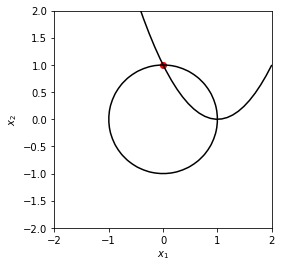

In [34]:
xx1, xx2 = np.meshgrid(np.linspace(-2,2,40),np.linspace(-2,2,40))
zz1 = xx1**2-2*xx1-xx2+1
zz2 = xx1**2+xx2**2-1

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
CS1 = ax.contour(xx1, xx2, zz1,levels = [0.0],colors='k')
CS2 = ax.contour(xx1, xx2, zz2,levels = [0.0],colors='k')
plt.scatter(xi[0],xi[1],color='red')

**Exemplo**: 

Considere o sistema de equações:

$$
\begin{matrix}
h_1(x,y,z)=2x+3y^3 - 2z x = 0\\
h_2(x,y,z)=9xy^2+2y - 2z y = 0\\
h_3(x,y,z)=x^2+y^2-1=0
\end{matrix}
$$

A função $\mathbf{H}(x,y,z) = (h_1(x,y,z),h_2(x,y,z),h_3(x,y,z))$
A matrix Jacobiana neste caso será:

$$
J_{(x_i,y_i,z_i)} = 
\begin{bmatrix}
\frac{\partial h_1}{\partial x} & \frac{\partial h_1}{\partial y} & \frac{\partial h_1}{\partial z}\\  
\frac{\partial h_2}{\partial x} & \frac{\partial h_2}{\partial y} & \frac{\partial h_2}{\partial z}\\ 
\frac{\partial h_3}{\partial x} & \frac{\partial h_3}{\partial y} & \frac{\partial h_3}{\partial z}\\ 
\end{bmatrix}_{(x_i,y_i,z_i)}=
\begin{bmatrix}
2(1-z) & 9y^2 & -2x \\
9y^2 & 18xy + 2(1-z) & -2y\\
2x & 2y & 0\\
\end{bmatrix}_{(x_i,y_i,z_i)}
$$

In [36]:
h1 = lambda x,y,z: 2*x + 3*y**3 - 2*z*x
h2 = lambda x,y,z: 9*x*y**2 + 2*y - 2*z*y
h3 = lambda x,y,z: x**2 + y**2 -1

def Jacobiano(xyz):  
    # xyz[0] = x, xyz[1] = y, xyz[2] = z
    return(np.array([[2*(1-xyz[2]), 9*xyz[1]**2, -2*xyz[0]],
                    [9*xyz[1]**2, 18*xyz[0]*xyz[1]+2*(1-xyz[2]), -2*xyz[1]],
                    [2*xyz[0], 2*xyz[1], 0]]))

def Newton_exemplo(xyz0):
    n = 20
    XYZ = np.zeros((3,n)) # XYZ[0] = x, XYZ[1] = y, XYZ[2] = z
    XYZ[:,0] = xyz0  # condição inicial
    H = np.zeros(3)
    for i in range(1,n):
        x,y,z = np.split(XYZ[:,i-1],3)
        H[:] = [h1(x,y,z), h2(x,y,z), h3(x,y,z)]
        J = Jacobiano(XYZ[:,i-1])
        dxyz = np.linalg.solve(J,-H)
        XYZ[:,i] = XYZ[:,i-1]+dxyz
    
    return(XYZ)

#xyz = Newton_exemplo([-0.5,1,0.1])
xyz = Newton_exemplo([0.5,-1,2])
np.set_printoptions(precision=2)
if (np.all(np.abs(xyz[:,-1]-xyz[:,-2])<1e-7)):
    print('A solução é:',xyz[:,-1])
    x,y,z = np.split(xyz[:,-1],3)
    print('h1,h2,h3 =',h1(x,y,z),h2(x,y,z),h3(x,y,z))
else:
    print('Solução Não convergiu !!')

A solução é: [ 0.5  -0.87 -0.95]
h1,h2,h3 = [-2.22e-16] [-2.22e-16] [0.]


### Método Quase-Newton
Nos exemplos acima, fica claro que calcular a matriz Jacobiana pode se tornar uma tarefa ingrata se o número de variáveis é grande e as funções que constituem o sistema são complexas.

Uma alternativa para evitar o cálculo da Jacobiana é tentar aproximá-la, ou seja, ao invés de utilizar a Jacobiana na equação equação

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - J_{\mathbf{x}_k}^{-1}\mathbf{H}(\mathbf{x}_k)
$$

utilizamos uma matriz $B_k\approx J_{\mathbf{x}_k}$ que aproxima a Jacobiana e que não demanda o cálculo de derivadas.

Uma das estratégias mais simples para encontrar a matriz $B_k$ é o método de Broyden, que é um exemplo da família de métodos conhecidos como **quase-Newton**.

O método Broyden pode ser resumido no seguinte algoritmo:

**Método Quase-Newton**:

1. Seja $B_0$ a matriz identidade e $\mathbf{x}_0$ a condição inicial do processo iterativo
2. Para $k = 1,\ldots$
3. $B_k\Delta\mathbf{x} = -\mathbf{H}_k$
4. $\mathbf{x}_{k+1} = \mathbf{x}_k+\Delta\mathbf{x}$
5. $\mathbf{y}_k = \mathbf{H}_{k+1} - \mathbf{H}_k$
6. $\mathbf{s}_k = \mathbf{x}_{k+1}-\mathbf{x}_{k}$
7. $B_{k+1} = B_k + \frac{(\mathbf{y}_k - B_k\mathbf{s}_k)\mathbf{s}_k^\top}{\mathbf{s}_k^\top\mathbf{s}_k}$

**Exemplo**

$$
h_1(x_1,x_2) = x_1^2-2x_1-x_2+1 = 0\\
h_2(x_1,x_2) = x_1^2+x_2^2-1 = 0
$$

In [42]:
h1 = lambda x1,x2: x1**2 - 2*x1 - x2 + 1
h2 = lambda x1,x2: x1**2 + x2**2 - 1

Bk = np.identity(2)
#xk = np.array([1.5,1.5])
xk = np.array([1.5,-0.5])
Hk = np.array([h1(xk[0],xk[1]),h2(xk[0],xk[1])])
for i in range(200):    
    Dx = np.linalg.solve(Bk,-Hk)    # passo 3 
    xk1 = xk + Dx                      # passo 4 
    Hk1 = np.array([h1(xk1[0],xk1[1]),h2(xk1[0],xk1[1])])
    yk = Hk1 - Hk           # passo 5
    sk = xk1 - xk           # passo 6    
    if np.linalg.norm(sk) < 1e-7:
        break
    Bk = Bk + ((yk-np.dot(Bk,sk)).reshape(-1,1)*sk)/np.dot(sk,sk)     # passo 7
    xk = xk1
    Hk = Hk1

print(xk,[h1(xk1[0],xk1[1]),h2(xk1[0],xk1[1])])

[1.00e+00 5.89e-09] [2.5859314689569146e-12, 2.0250467969162855e-12]


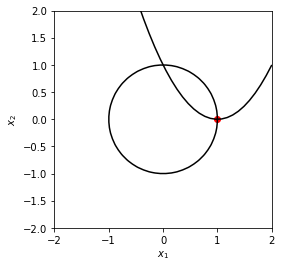

In [43]:
xx1, xx2 = np.meshgrid(np.linspace(-2,2,40),np.linspace(-2,2,40))
zz1 = xx1**2-2*xx1-xx2+1
zz2 = xx1**2+xx2**2-1

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
CS1 = ax.contour(xx1, xx2, zz1,levels = [0.0],colors='k')
CS2 = ax.contour(xx1, xx2, zz2,levels = [0.0],colors='k')
plt.scatter(xk[0],xk[1],color='red')

## <font color='blue'> Multiplicadores de Lagrange </font>

Muitos problemas reais consistem em encontrar uma solução para um problema de otimização da forma:

$$
\min f(x_1,\ldots,x_n), \quad \mbox{sujeito a}\\
g(x_1,\ldots,x_n)=0
$$

onde $f,g:\mathbb{R}^n\rightarrow \mathbb{R}$. A função $f$ é chamada de **função objetivo** e $g$ de **restrição** do problema.

**Exemplo**

Encontre o ponto da curva $g(x,y)=0$ que está mais próximo do ponto $\mathbf{p}$.

Tal problema pode ser modelado como

$$
\min\, (x-p_x)^2+(y-p_y)^2, \quad \mbox{sujeito a}\\
g(x,y)=0
$$

A função objetivo é o quadrardo da distânica de um ponto qualquer ao ponto $\mathbf{p}$ e a restrição força $(x,y)$ estarem sobre a curva desejada.

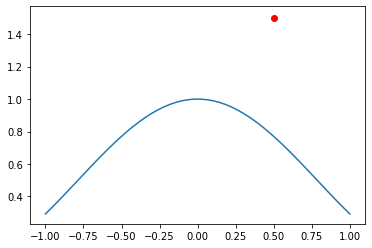

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,50)
y = np.cos(x)**2          # g(x,y) = y - cos^2(x) = 0
p = np.array([0.5,1.5])   # p

plt.plot(x,y)
plt.scatter(p[0],p[1],color='red')

Uma ferramenta matemática muito utilizada para resolver este tipo de problema é o chamado **multiplicador de Lagrange**. 

Vamos entender o método do multiplicador de lagrange com um exemplo simples: 

Suponha que desejamos resolver o seguinte problema 

$$
\min \frac{1}{2}x^2+2y^2,\quad\mbox{sujeito a}\\
x + y - 1 = 0
$$

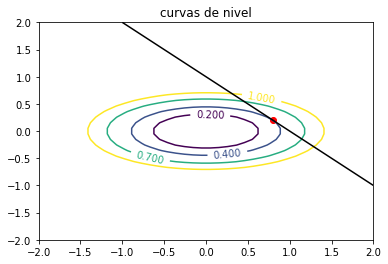

In [3]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-2,2,40), np.linspace(-2,2,40))
zz = 0.5*xx**2+2*yy**2

fig, ax = plt.subplots()
CS = ax.contour(xx, yy, zz,levels = [0.2,0.4,0.7,1])
ax.contour(xx, yy, xx+yy-1.0,levels = [0],colors='k')
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('curvas de nivel')

plt.scatter(4/5,1/5,color='red')

Vamos calcular o gradiente de $f(x,y)=\frac{1}{2}x^2+2y^2$  e $g(x,y)=x+y-1$ no ponto $(\frac{4}{5},\frac{1}{5})$, que é onde a reta intersecta a curva de nível $0.4$.

$$
\nabla f(x,y)=(x,4y)\rightarrow \nabla f(\frac{4}{5},\frac{1}{5})=(\frac{4}{5},\frac{4}{5})\\
\nabla g(x,y)=(1,1)\rightarrow \nabla g(\frac{4}{5},\frac{1}{5})=(1,1)
$$

Note que no ponto $(\frac{4}{5},\frac{1}{5})$ temos que $\nabla f(x,y)=\frac{4}{5}\nabla g(x,y)$, ou seja, os gradientes da função objetivo e da restrição são múltiplos um do outro.

É exatamente este fato que o método de multiplicador de Lagrange explora.  

---

**Teorema**: Sejam $f:\mathbb{R}^n\rightarrow\mathbb{R}$ e $g:\mathbb{R}^n\rightarrow\mathbb{R}$ funções suaves e suponha que $\nabla g\neq 0$ para qualquer ponto na superfície de nível $g(\mathbf{x})=0$. As soluções do problema

$$
\min f(\mathbf{x}), \quad \mbox{sujeito a}\\
g(\mathbf{x})=0
$$

caso existam, ocorrem em pontos $\overline{\mathbf{x}}$ tal que 

$$
\nabla f(\overline{\mathbf{x}})=\lambda \nabla g(\overline{\mathbf{x}})
$$

onde $\lambda$ (multiplicador de Lagrange) é um valor escalar.

---

O teorema acima permite escrever o problema de minimização com restrição como um problema sem restrição, ou seja, resolver

$$
\min f(\mathbf{x}), \quad \mbox{sujeito a}\\
g(\mathbf{x})=0
$$

é equivalente a encontrar o mínimo de 

$$
F(\mathbf{x},\lambda) = f(\mathbf{x}) - \lambda g(\mathbf{x})
$$

O ponto de mínimo de $F(\mathbf{x},\lambda)$ ocorre onde o gradiente se anula, ou seja:

$$
\nabla F(\mathbf{x},\lambda) = 0 \rightarrow
\left\{\begin{matrix}
\frac{\partial f}{\partial x_1}(\mathbf{x}) -\lambda \frac{\partial g}{\partial x_1}(\mathbf{x})=0\\
\frac{\partial f}{\partial x_2}(\mathbf{x}) -\lambda \frac{\partial g}{\partial x_2}(\mathbf{x})=0\\
\vdots\\
\frac{\partial f}{\partial x_n}(\mathbf{x}) -\lambda \frac{\partial g}{\partial x_n}(\mathbf{x})=0\\
g(\mathbf{x})=0
\end{matrix}\right.\rightarrow
\left\{\begin{matrix}
\nabla f(\mathbf{x}) = \lambda\nabla g(\mathbf{x})\\
g(\mathbf{x})=0
\end{matrix}\right.
$$

Desta forma, encontrar o ponto de mínimo equivale a resolver um sistema com $n+1$ equações e $n+1$ variáveis.

**Exemplo**:

$$
\min x^2+3xy^3+y^2,\quad\mbox{sujeito a}\\
x^2+y^2-1=0
$$

Utilizando multiplicador de Lagrange, a solução pode ser encontrada resolvendo o sistema de equações:

$$
F(x,y,\lambda) = (x^2+3xy^3+y^2) - \lambda(x^2+y^2-1)\\
\Downarrow\\
\nabla F(x,y,\lambda) = \mathbf{0}\\
\Downarrow
$$

$$
\begin{matrix}
2x+3y^3 - 2\lambda x = 0\\
9xy^2+2y - 2\lambda y = 0\\
x^2+y^2-1=0
\end{matrix}
$$

O sistema de equações acima é não linear, sendo difícil encontrar uma solução analítica. Podemos, porém, empregar o método de Newton (ou Quase-Newton) para encontrar uma solução. 

In [14]:
h1 = lambda v: 2*v[0] + 3*v[1]**3 - 2*v[2]*v[0]
h2 = lambda v: 9*v[0]*v[1]**2 + 2*v[1] - 2*v[2]*v[1]
h3 = lambda v: v[0]**2 + v[1]**2 -1

J = lambda v: np.array([[2*(1-v[2]), 9*v[1]**2, -2*v[0]],
                        [9*v[1]**2, 18*v[0]*v[1]+2*(1-v[2]), -2*v[1]],
                        [2*v[0], 2*v[1], 0]])
def Newton(x0):
    xi = x0
    H = np.zeros(3)
    for i in range(20):
        H[:] = [h1(xi),h2(xi),h3(xi)]
        Dx = np.linalg.solve(J(xi),-H)
        xi = xi + Dx 
    return(xi)

#xi = Newton(np.array([-0.5,-0.7,0.1]))
xi = Newton(np.array([-0.5,-1.3,0.1]))
np.set_printoptions(precision=2)
if (np.all(np.abs([h1(xi),h2(xi),h3(xi)])<1e-7)):
    print('A solução é:',xi[:2])
    print('Que esta na curva de nível',xi[0]**2+3*xi[0]*xi[1]**3+xi[1]**2)
    print('O valor de lambda é',xi[2])
else:
    print('Solução Não convergiu !!')

A solução é: [-0.5  -0.87]
Que esta na curva de nível 1.974278579257494
O valor de lambda é 2.948557158514987


In [18]:
print('Gradiente de f na solucao [',2*xi[0] + 3*xi[1]**3,9*xi[0]*xi[1]**2 + 2*xi[1],']')
print('Gradiente de g na solucao [',2*xi[0],2*xi[1],']')
print('Verificando o paralelismo dos gradientes')
print('[',2*xi[0] + 3*xi[1]**3,9*xi[0]*xi[1]**2 + 2*xi[1],']=[',2*xi[0]*xi[2],2*xi[1]*xi[2],']')

Gradiente de f na solucao [ -2.9485571585149875 -5.107050807568878 ]
Gradiente de g na solucao [ -1.0 -1.7320508075688774 ]
Verificando o paralelismo dos gradientes
[ -2.9485571585149875 -5.107050807568878 ]=[ -2.948557158514987 -5.107050807568878 ]


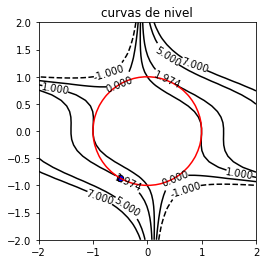

In [12]:
xx, yy = np.meshgrid(np.linspace(-2,2,40), np.linspace(-2,2,40))
zz = xx**2+3*xx*yy**3+yy**2

fig, ax = plt.subplots()
ax.set_aspect('equal')
CS1 = ax.contour(xx, yy, zz,colors='k',levels=[-1,0,1,1.974,5,7])
CS2 = ax.contour(xx, yy, xx**2+yy**2-1.0,colors='red',levels=[0])
ax.clabel(CS1, inline=1, fontsize=10)
ax.set_title('curvas de nivel')

plt.scatter(xi[0],xi[1],color='blue',s=40,edgecolors='k')

**Importante**: o método de Newton encontra um solução do problema, mas não garante que esta solução seja o mínimo da função objetivo.

No exemplo acima, notamos que podem existir diversas solução e precisamos encontrar qual delas é mínimo da função objetivo.

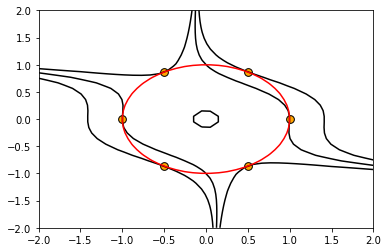

In [24]:
xx, yy = np.meshgrid(np.linspace(-2,2,40), np.linspace(-2,2,40))
zz = xx**2+3*xx*yy**3+yy**2

fig, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz,colors='k',levels=[0.025,1,2])
CS2 = ax.contour(xx, yy, xx**2+yy**2-1.0,colors='red',levels=[0])

solucoes = np.asarray([[-1,0], [-0.5, -0.87], [0.5, -0.87], [1, 0], [0.5,  0.87], [-0.5, 0.87]])
plt.scatter(solucoes[:,0],solucoes[:,1],color='orange',s=60,edgecolors='k')

Embora existam métodos para verificar se uma solução é um ponto de mínimo, uma forma simples de resolver a qestão é encontrar várias pontos de solução do sistema de equações e adotar aquele cuja função objetivo é mínima.

In [28]:
fobjetivo = lambda x: x[0]**2+3*x[0]*x[1]**3+x[1]**2

s1 = Newton([-1,0.5,0.1]) 
print('Valor funcao objetivo no ponto S1',s1,':',fobjetivo(s1))

s2 = Newton([-0.5,-1,0.1])
print('Valor funcao objetivo no ponto S2',s2,':',fobjetivo(s2))

s3 = Newton([0.5,-1,0.1])
print('Valor funcao objetivo no ponto S3',s3,':',fobjetivo(s3))

s4 = Newton([1,0.5,0.1])
print('Valor funcao objetivo no ponto S4',s4,':',fobjetivo(s4))

s5 = Newton([0.5,1,0.1])
print('Valor funcao objetivo no ponto S5',s5,':',fobjetivo(s5))

s6 = Newton([-0.5,1,0.1])
print('Valor funcao objetivo no ponto S6',s6,':',fobjetivo(s6))

print('\n As soluções para o problema de otimização são',s3[:2], 'e', s6[:2])

Valor funcao objetivo no ponto S1 [-1.00e+00  3.05e-07  1.00e+00] : 1.0000000000000933
Valor funcao objetivo no ponto S2 [-0.5  -0.87  2.95] : 1.9742785792574935
Valor funcao objetivo no ponto S3 [ 0.5  -0.87 -0.95] : 0.025721420742506385
Valor funcao objetivo no ponto S4 [1.00e+00 5.56e-07 1.00e+00] : 1.0000000000003086
Valor funcao objetivo no ponto S5 [0.5  0.87 2.95] : 1.9742785792574935
Valor funcao objetivo no ponto S6 [-0.5   0.87 -0.95] : 0.025721420742506385

 As soluções para o problema de otimização são [ 0.5  -0.87] e [-0.5   0.87]


Passos para resolver o problema:

$$
\min f(\mathbf{x}), \quad \mbox{sujeito a}\\
g(\mathbf{x})=0
$$

1. Escrever $F(\mathbf{x},\lambda) = f(\mathbf{x}) - \lambda g(\mathbf{x})$
2. $\nabla F(\mathbf{x},\lambda) = 0$ (obtendo o sistema de equações)
3. Aplicar o método de Newton (ou Quase-Newton)<br>
    3.1 Calcular o Jacobiano de H (que é dada pelo sistema de equações)
4. Verificar se a solução encontrada é ponto de mínimo de $f$